# **Código para o modulo de Machine Learning 2**
---
### **Aprendizado supervisionado**


1.   **TRATAMENTO DOS DADOS** - Neste código consta um processo de tratamento de variáveis robusto. Foi realizado tratamento de: outliers, variáveis categóricas e avaliadas as correlações entre variáveis.

2.   **MODELOS MATEMÁTICOS** - O problema enfrentado nesse dataset era determinar se um cliente estava apto a receber emprestimo ou não, para tal, após o tratamento dos dados, avaliamos os modelos aprendidos durante o curso para tentar solucionar o problema. Os métodos utilizados foram: Adaboost, GradientBoost, XGBoost, SVM e KNN.



## Bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Métricas de avaliação
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error, r2_score
from sklearn.metrics import RocCurveDisplay

# Pre-processamento
from sklearn.preprocessing import StandardScaler

# Modelos
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# Tirar avisos
import warnings
warnings.filterwarnings("ignore")

## Importação dos dados

In [2]:
dt2 = pd.read_csv('loan_data.csv',delimiter=',')

## Coleta de informações sobre o Dataset

In [3]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## Explorando os dados

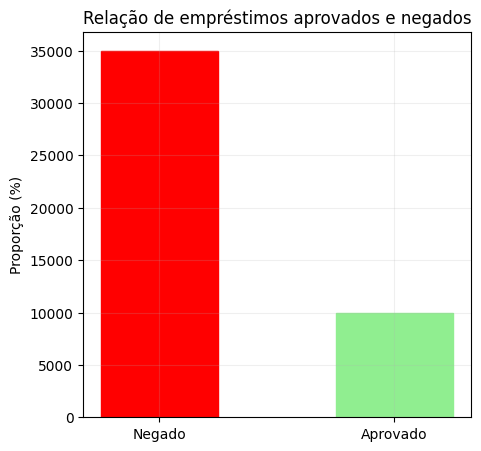

In [4]:
contador= dt2['loan_status'].value_counts(dropna=True, normalize=False)

plt.figure(figsize=(5,5))
plt.grid(alpha=.2)
bars = plt.bar(contador.index, contador.values, width=.5)
bars[0].set_color('red')
bars[1].set_color('lightgreen')
plt.xticks([0, 1], ['Negado', 'Aprovado'], rotation=0)
plt.title('Relação de empréstimos aprovados e negados')
plt.ylabel('Proporção (%)')
plt.show()

In [5]:
def cat_loan_aprovall_rate(column):
    graph = dt2.groupby(['loan_status', column]).size().unstack()
    graph.plot(kind='bar', stacked=False)
    plt.xticks([0,1],['Negado', 'Aprovado'], rotation=0)
    plt.xlabel('')
    plt.show()

    df_analysis = dt2.groupby(['loan_status', column]).size().unstack().T
    df_analysis['aprovall_rate'] = df_analysis[1] * 100 / (df_analysis[0] + df_analysis[1])

    df_analysis = df_analysis.drop(columns=[0,1])

    df_analysis = df_analysis.sort_values(by='aprovall_rate', ascending=False)
    df_analysis.plot(kind='bar', stacked=False)
    plt.xlabel('')
    plt.ylabel('Taxa de aprovação (%)')
    plt.legend('')
    plt.show()

    display(df_analysis.sort_values(by='aprovall_rate', ascending=False))

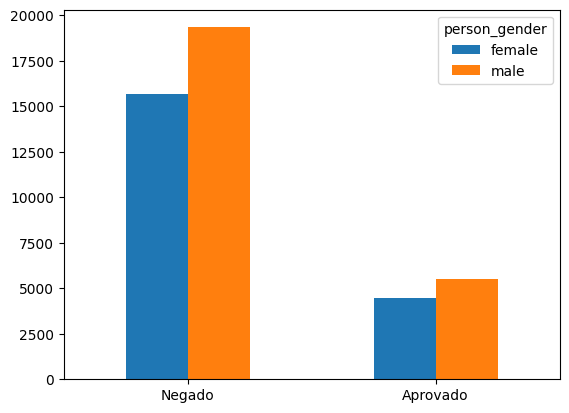

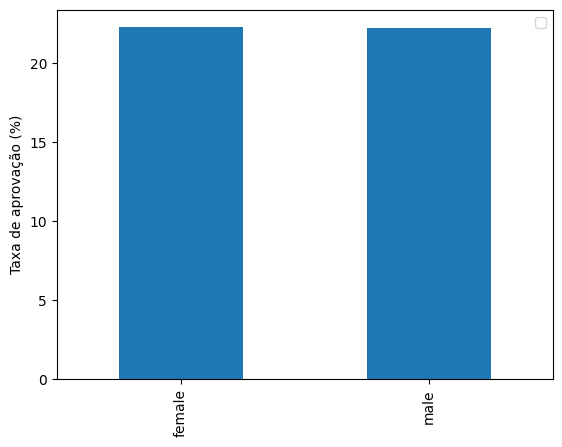

loan_status,aprovall_rate
person_gender,
female,22.248127
male,22.201200


In [6]:
cat_loan_aprovall_rate('person_gender')

Propocionalmente, a taxa de aprovação entre homens e mulheres é muito próxima.

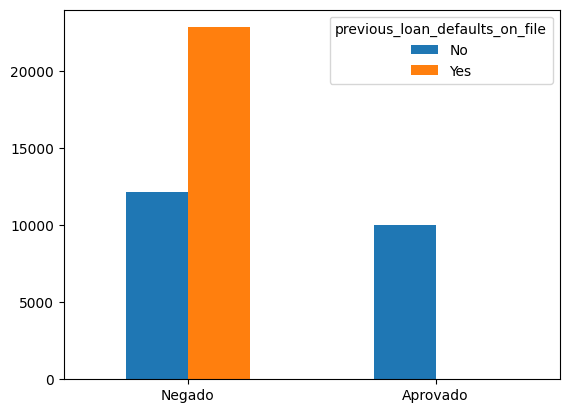

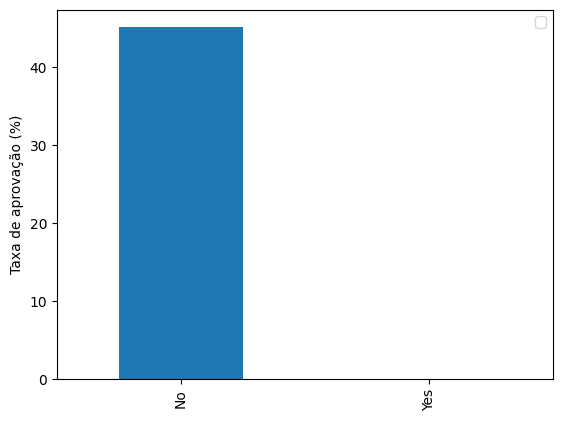

loan_status,aprovall_rate
previous_loan_defaults_on_file,
No,45.163039
Yes,NaN


In [7]:
cat_loan_aprovall_rate('previous_loan_defaults_on_file')

Todas as pessoas que já tem um pedido de empréstimo anterior arquivado, tiveram seus pedidos negados.

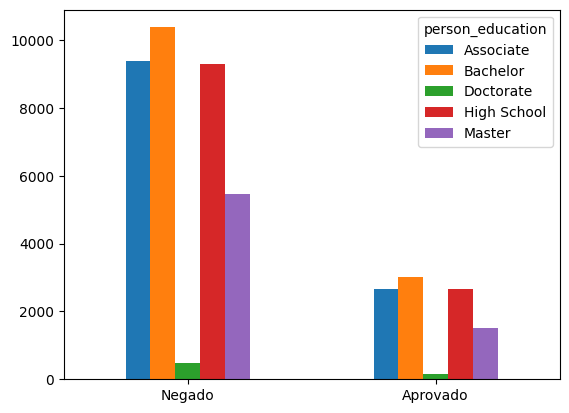

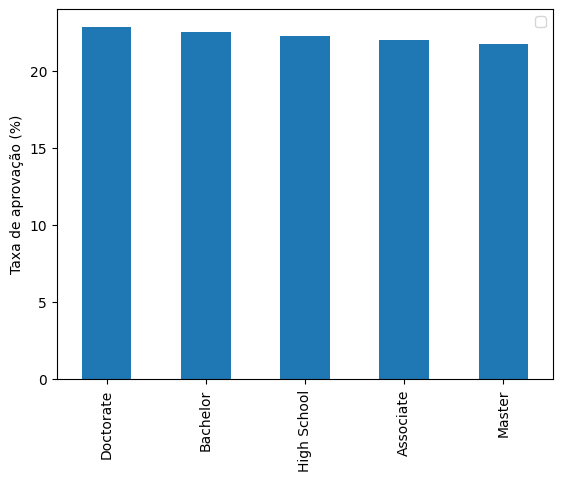

loan_status,aprovall_rate
person_education,
Doctorate,22.866345
Bachelor,22.524069
High School,22.310391
Associate,22.031926
Master,21.762178


In [8]:
cat_loan_aprovall_rate('person_education')

Proporcionalmente, a diferença de aprovação pela escolaridade é bem pequena.

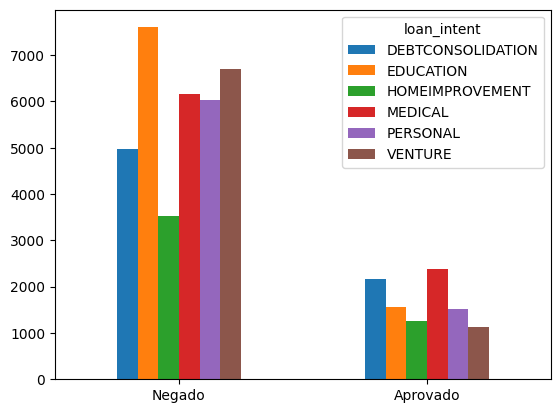

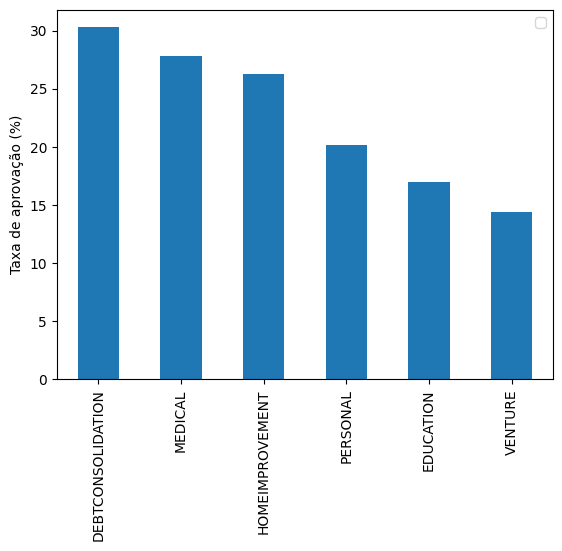

loan_status,aprovall_rate
loan_intent,
DEBTCONSOLIDATION,30.272918
MEDICAL,27.819373
HOMEIMPROVEMENT,26.301484
PERSONAL,20.140360
EDUCATION,16.956189
VENTURE,14.426397


In [9]:
cat_loan_aprovall_rate('loan_intent')

Já no motivo pelo qual o empréstimo foi solicitado, temos uma diferença bem evidente.
Proporcionalmente os pedidos mais aprovados são os de consolidação de débito, seguidos do uso para fins médicos e gastos para reformas.
O motivo menos aprovado é o de uso para investimentos, possivelmente pelo risco natural desse uso.

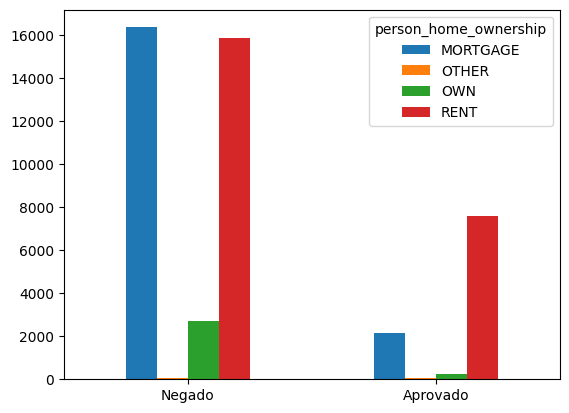

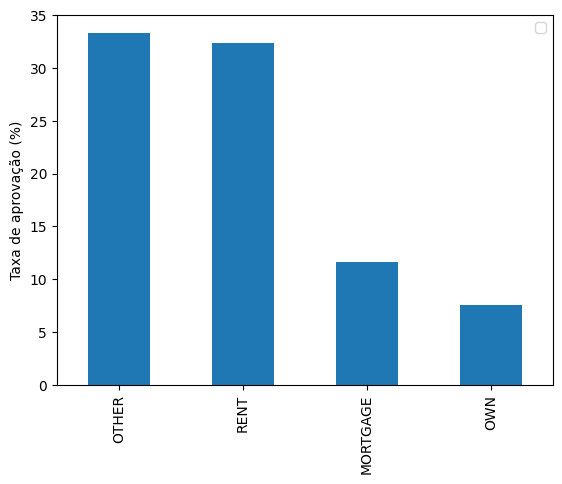

loan_status,aprovall_rate
person_home_ownership,
OTHER,33.333333
RENT,32.397731
MORTGAGE,11.596084
OWN,7.522874


In [10]:
cat_loan_aprovall_rate('person_home_ownership')

Apesar da proporção alta de aprovação na categoria "outros", podemos perceber pelo primeiro gráfico que são poucos dados nessa categoria. Dessa forma, a maior taxa de aprovação está para pessoas que moram em uma casa alugada.

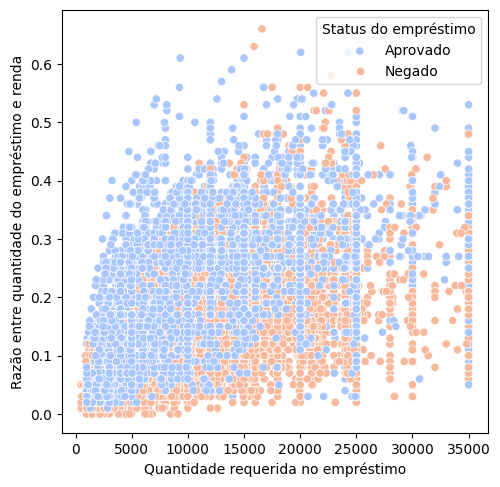

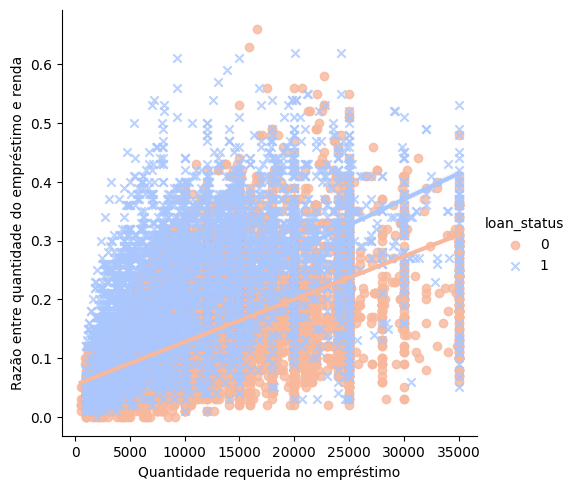

In [11]:
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(dt2,x='loan_amnt', y='loan_percent_income', hue='loan_status', palette='coolwarm_r')
plt.legend(title= 'Status do empréstimo', labels = ['Aprovado', 'Negado'])
plt.xlabel('Quantidade requerida no empréstimo')
plt.ylabel('Razão entre quantidade do empréstimo e renda')
plt.show()

graph = sns.lmplot(dt2,x='loan_amnt',y='loan_percent_income', hue='loan_status', markers=["o", "x"], palette='coolwarm_r', line_kws={'linewidth': 3})
plt.xlabel('Quantidade requerida no empréstimo')
plt.ylabel('Razão entre quantidade do empréstimo e renda')
plt.show()

Pelos gráficos acima, temos barreiras bem definidas nas quantidades requeridas de 20.000 e 25.000. Valores acima disso são difíceis de serem aceitos. Além disso, é possível perceber uma correlação entre a quantidade requerida no empréstimo e o quanto o valor do empréstimo representa do salário do cliente. A tendência indica que conforme o valor do empréstimo é maior, a razão empréstimo/salário também tende a crescer.

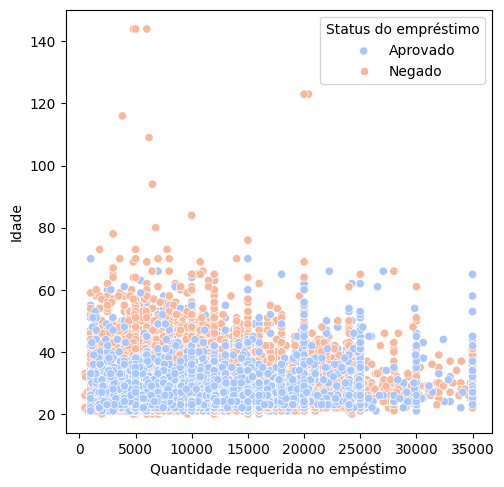

In [12]:
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(dt2,x='loan_amnt', y='person_age', hue='loan_status', palette='coolwarm_r')
plt.legend(title= 'Status do empréstimo', labels = ['Aprovado', 'Negado'])
plt.ylabel('Idade')
plt.xlabel('Quantidade requerida no empéstimo')
plt.show()

Outra barreira importante é na idade os clientes. O gráfico acima indica que a maioria dos empréstimos aprovados são para clientes de até 40 anos.

## Funções de pré-tratamento

In [13]:
def varre_linha(data, lnh):
  dt_aux = np.array(data.iloc[lnh:lnh+1])
  ln, cl = dt_aux.shape
  x=0
  for c in range(cl):
    if dt_aux[0][c]>3:
      x=1
    break
  return x

def varrendo_col_obj(data):
  print("Cortando caminho e trabalho chato.\n")
  cont = 0
  obj = data.select_dtypes(include=object)
  for cl in obj.columns:
    cont = cont+1
    print(f'Value_counts da {cont}º Variável categórica:\n')
    print(f'{data[cl].value_counts()}\n')

def varre_linha(data, lnh):
  dt_aux = np.array(data.iloc[lnh:lnh+1])
  ln, cl = dt_aux.shape
  x=0
  for c in range(cl):
      if dt_aux[0][c]>3:
        x=1
        break
  return x

def idt_out(data):
  colunas = data.select_dtypes(include=object).columns
  x = data.drop(colunas, axis=1)
  scaler = StandardScaler()
  dt_norm = pd.DataFrame(scaler.fit_transform(x)).reset_index()
  dt_aux = dt_norm.drop('index', axis=1)
  outliers = []
  ln, cl = dt_aux.shape

  for lnh in range(ln):
    if varre_linha(dt_aux,lnh)==1:
      outliers.append(dt_norm['index'][lnh])
  return outliers

def remove_out(data):
  obj = data.select_dtypes(include=object)
  data_gd = pd.get_dummies(data, columns=obj.columns).astype(float)
  out = idt_out(data)
  data_clear = data_gd.drop(out,axis=0)
  return data_clear

data_clear = pd.DataFrame(remove_out(dt2))

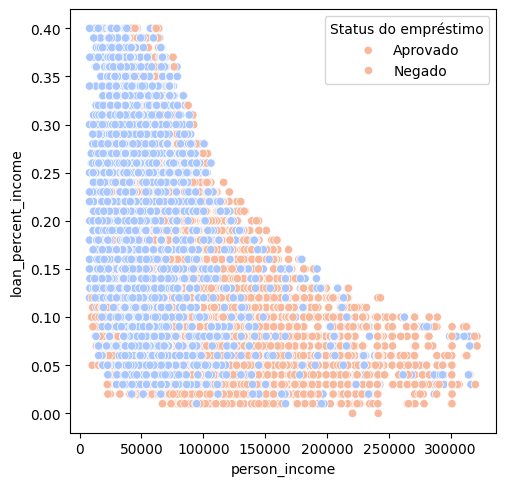

In [14]:
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(data_clear,x='person_income', y='loan_percent_income', hue='loan_status', palette='coolwarm_r')
plt.legend(title= 'Status do empréstimo', labels = ['Aprovado', 'Negado'])
plt.show()

No gráfico acima fica evidente que a maioria dos empréstimos aprovados fica com pessoas de renda anual de até 125.000.

## Explorando as correlações

<Axes: >

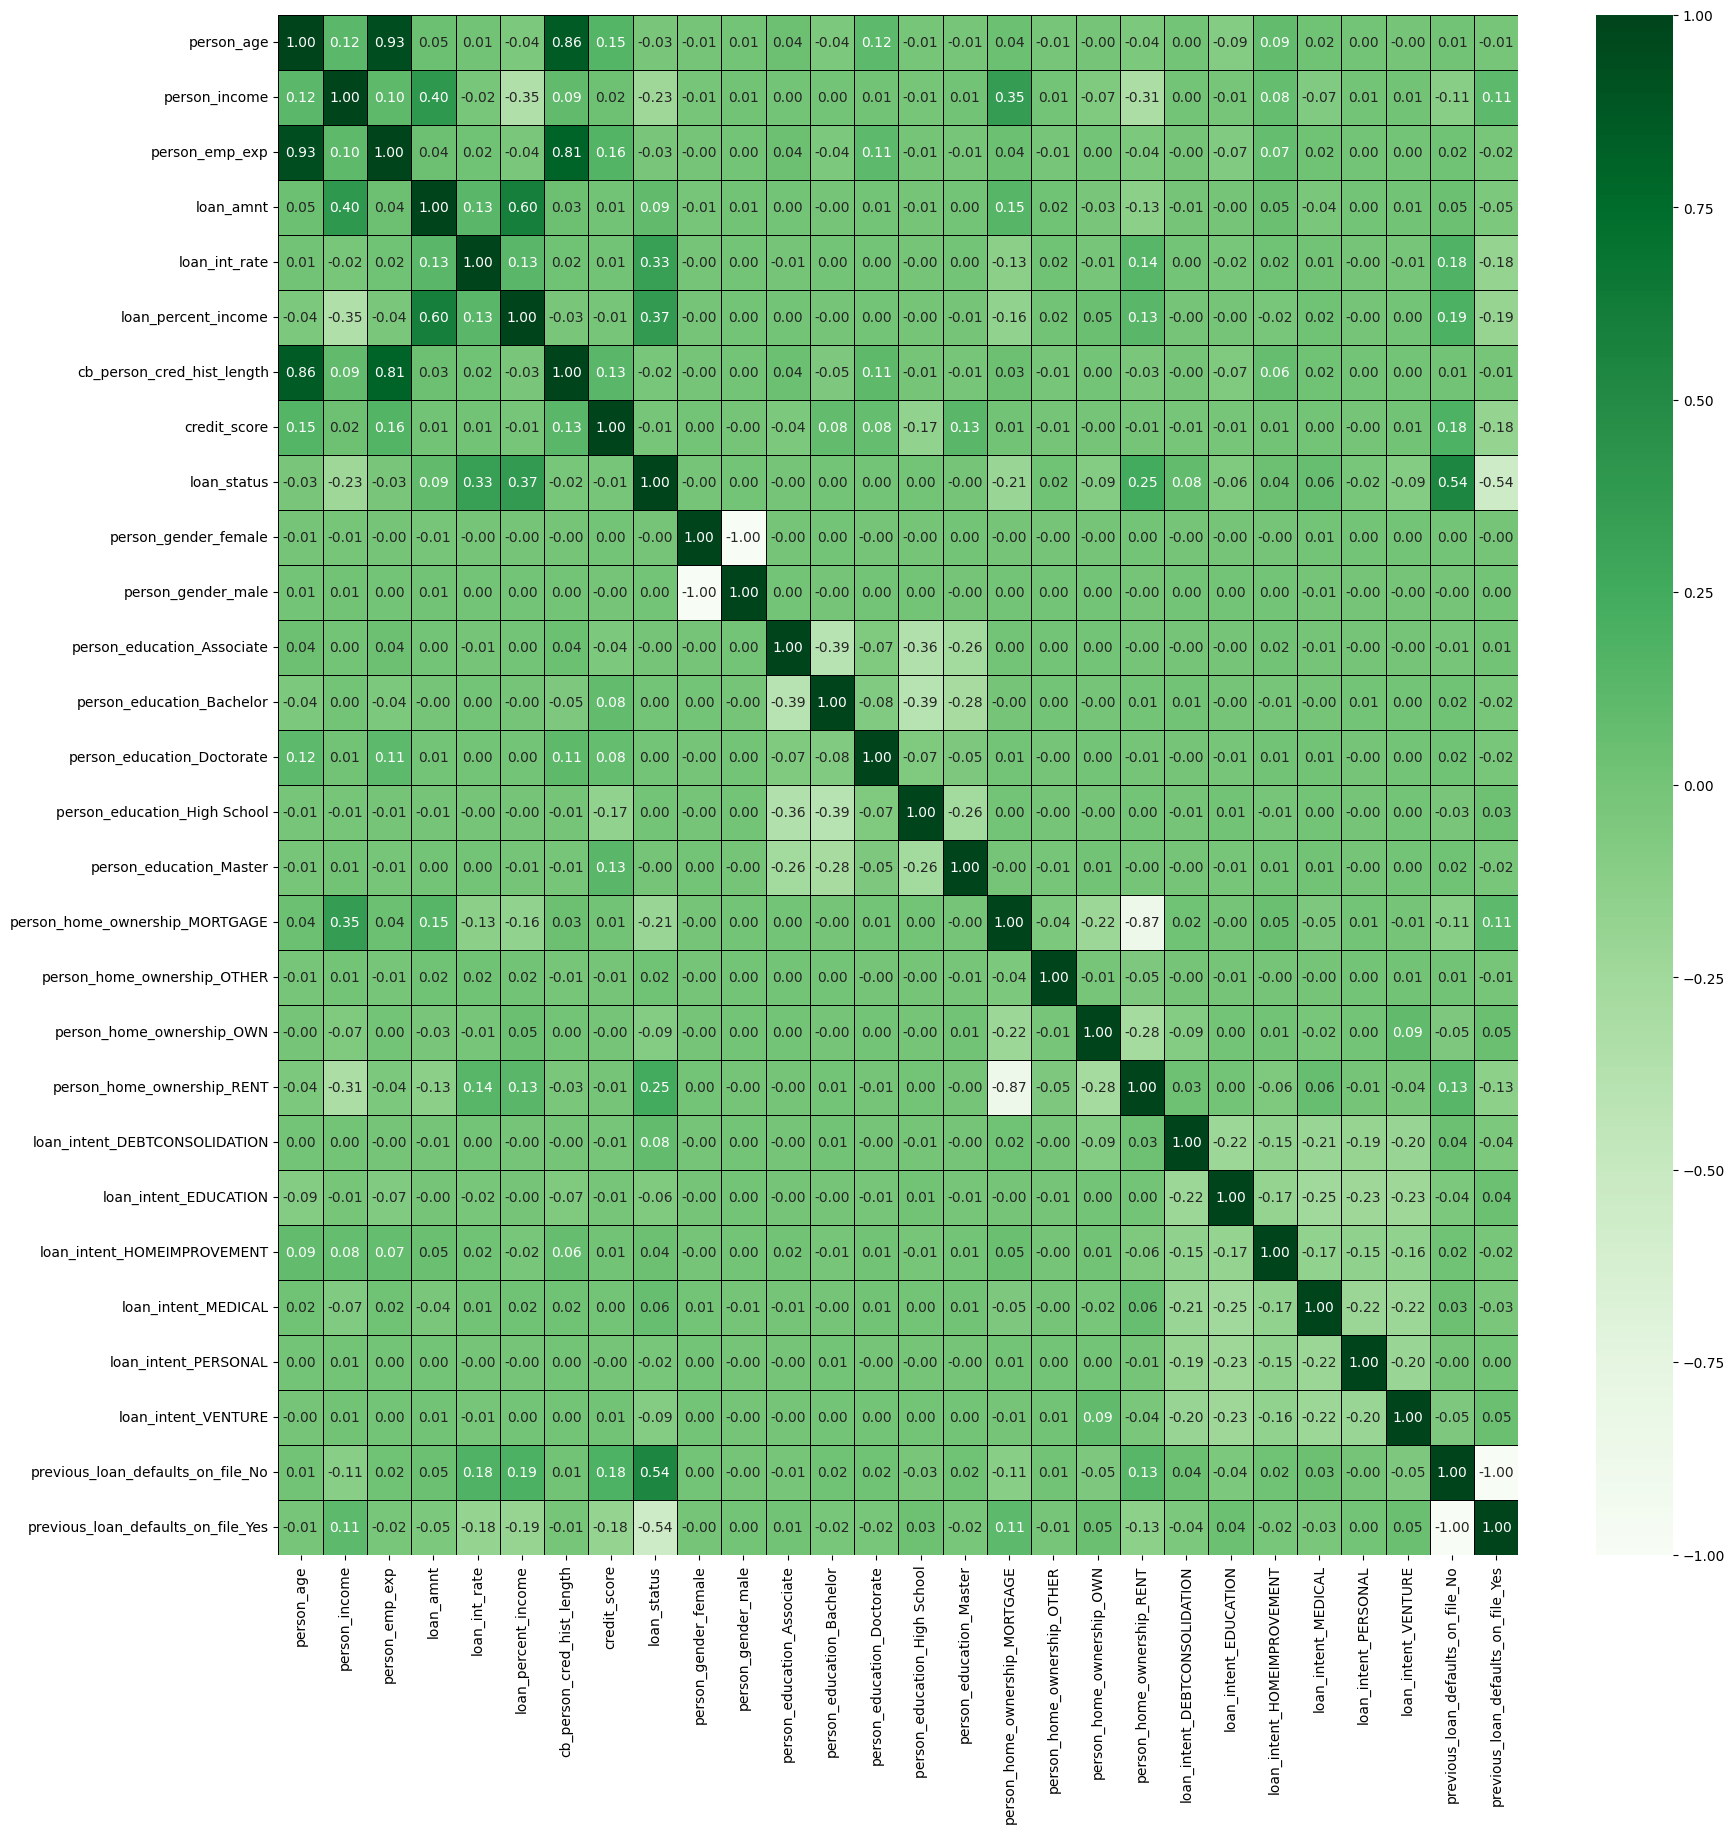

In [ ]:
dataframe = pd. DataFrame(data=data_clear, columns=data_clear.columns)
matrix = dataframe.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(matrix,vmin=None, vmax=None, cmap="Greens", center=None, robust=False,
            annot=True, fmt='.2f', annot_kws=None, linewidths=0.5, linecolor='black',
            cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto',
            yticklabels='auto', mask=None, ax=None)

<Axes: >

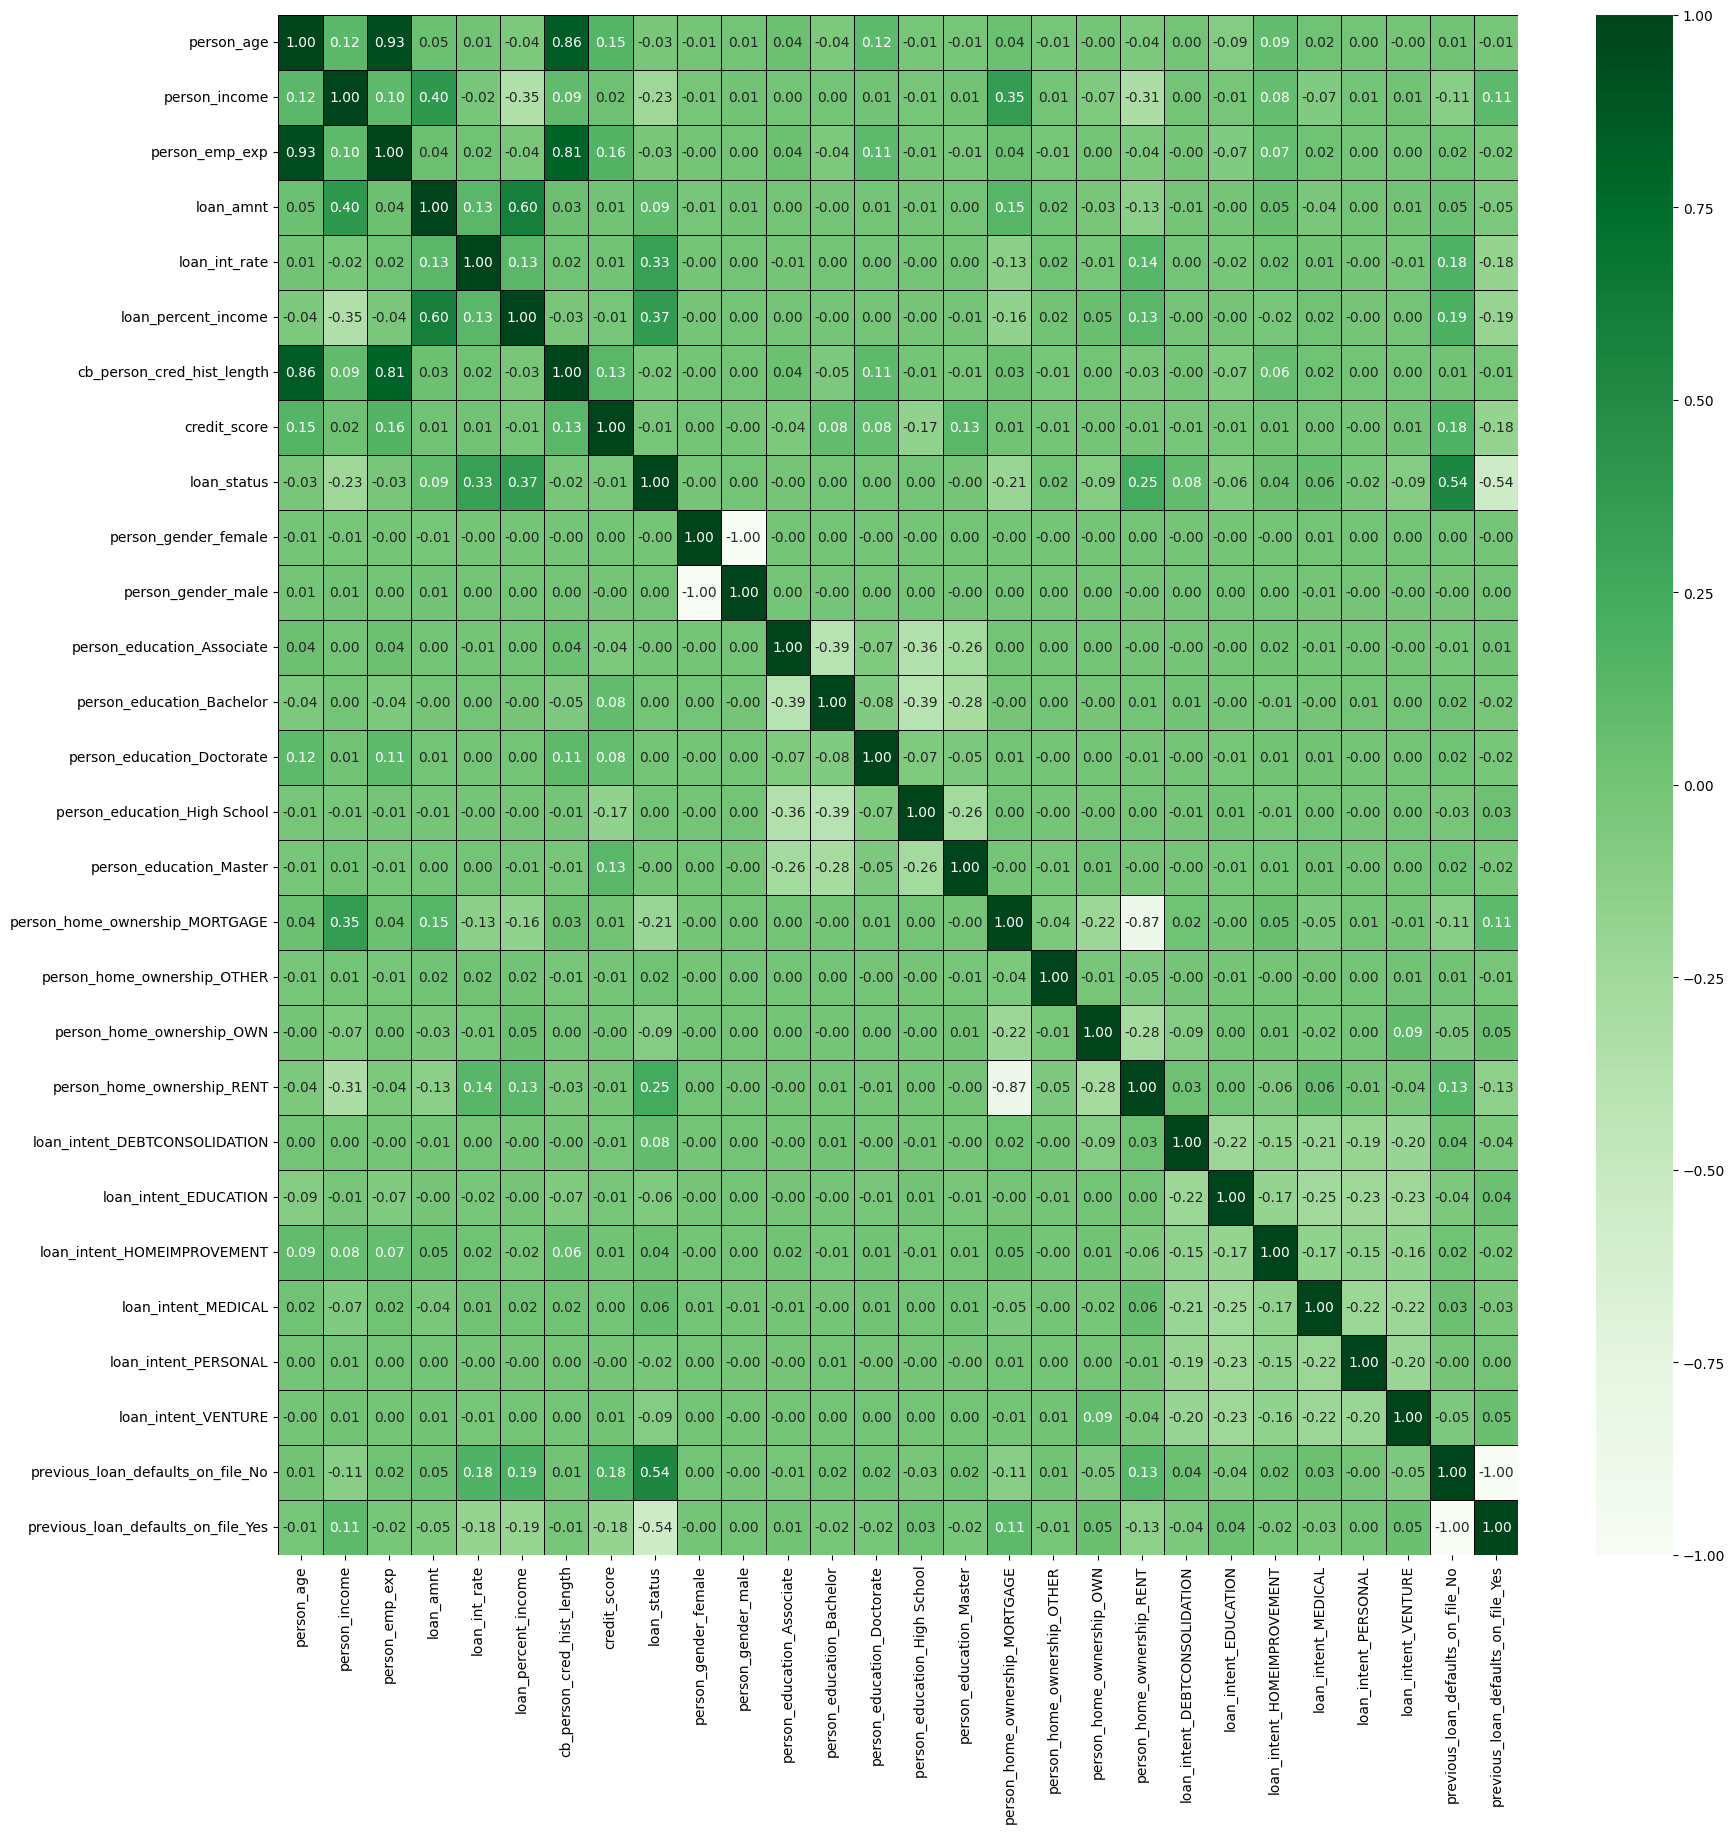

In [ ]:
scaler = StandardScaler()
dataframe = pd.DataFrame(scaler.fit_transform(data_clear), columns=data_clear.columns)
matrix = dataframe.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(matrix,vmin=None, vmax=None, cmap="Greens", center=None, robust=False,
            annot=True, fmt='.2f', annot_kws=None, linewidths=0.5, linecolor='black',
            cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto',
            yticklabels='auto', mask=None, ax=None)

## Removendo variáveis muito correlacionadas

In [ ]:
def id_de_variaveis_muito_correelacionadas(data):
  var_relacionadas = []
  for var in data.columns:
    data_cor = data.corr()[var].sort_values(ascending=False)
    col_int = data_cor[(abs(data_cor)>=0.8) & (abs(data_cor)<1.00)].reset_index()
    if col_int.size != 0:
      for i in range(len(col_int['index'])):
        var_relacionadas.extend([var,col_int['index'][i]])
  var_relacionadas = list(set(var_relacionadas))
  return var_relacionadas

var_relacionadas = id_de_variaveis_muito_correelacionadas(data_clear)

In [ ]:
data_clear.corr()['loan_status'].sort_values(ascending=False).loc[var_relacionadas]

,loan_status
person_emp_exp,-0.025843
person_home_ownership_MORTGAGE,-0.207208
person_home_ownership_RENT,0.248645
cb_person_cred_hist_length,-0.019282
person_age,-0.027203


In [ ]:
target = data_clear['loan_status']
features = data_clear.drop('loan_status', axis=1)
features = features.drop(['person_home_ownership_MORTGAGE', 'cb_person_cred_hist_length', 'person_emp_exp'], axis=1)
features

,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,credit_score,person_gender_female,person_gender_male,person_education_Associate,person_education_Bachelor,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
1,21.0,12282.0,1000.0,11.14,0.08,504.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,21.0,12951.0,2500.0,7.14,0.19,532.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,21.0,12739.0,1600.0,14.74,0.13,640.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
11,21.0,13113.0,4500.0,8.63,0.34,651.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19,24.0,14283.0,1750.0,10.99,0.12,679.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,15000.0,15.66,0.31,645.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
44996,37.0,65800.0,9000.0,14.07,0.14,621.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
44997,33.0,56942.0,2771.0,10.02,0.05,668.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44998,29.0,33164.0,12000.0,13.23,0.36,604.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Avaliação do impacto da remoção de outliers na proporção dos targets



In [ ]:
dif = abs(target.value_counts()[1]/target.value_counts()[0] - dt2['loan_status'].value_counts()[1]/dt2['loan_status'].value_counts()[0])
print(f'Diferença absoluta entre a proporção entre as classes antes e depois da remoção de outliers: {dif}')

## Features e Targets

In [ ]:
X = features
scaler = StandardScaler()
x_norm = scaler.fit_transform(features)
y = target

## Função de plot da curva HOC

In [ ]:
def plot_curva_roc(nome_do_modelo,modelo,x_train,x_test,y_train,y_test):
  plt.figure()
  plot_test = RocCurveDisplay.from_estimator(modelo, Xadb_test, yadb_test)
  plt.title(f'Curva ROC ({nome_do_modelo}) - Conjunto de teste')
  plt.show()

  plt.figure()
  plot_train = RocCurveDisplay.from_estimator(modelo, Xadb_train, yadb_train)
  plt.title(f'Curva ROC ({nome_do_modelo}) - Conjunto de treino')
  plt.show()

## Adaboost - Sem normalizar

---


Acurácia: 0.9193
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      6747
         1.0       0.87      0.74      0.80      1853

    accuracy                           0.92      8600
   macro avg       0.90      0.85      0.87      8600
weighted avg       0.92      0.92      0.92      8600

Acurácia: 0.9200
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     26987
         1.0       0.87      0.74      0.80      7410

    accuracy                           0.92     34397
   macro avg       0.90      0.86      0.88     34397
weighted avg       0.92      0.92      0.92     34397



<Figure size 640x480 with 0 Axes>

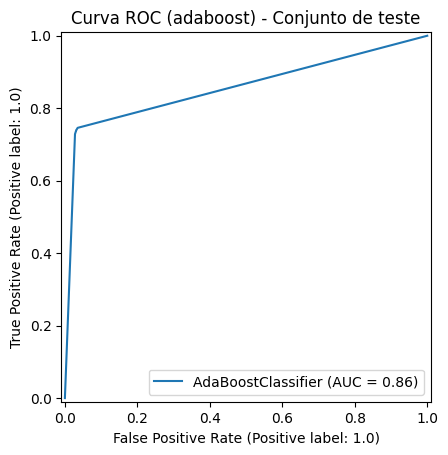

<Figure size 640x480 with 0 Axes>

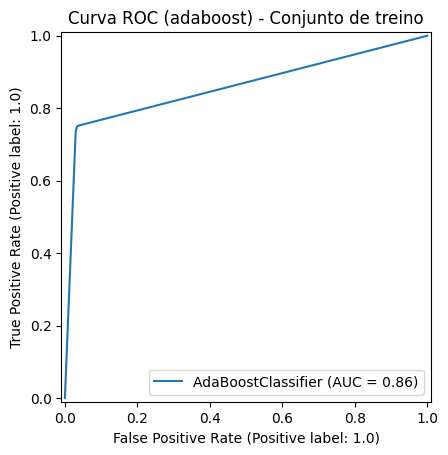

In [ ]:
Xadb_train, Xadb_test, yadb_train, yadb_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=7),
    n_estimators=500,
    learning_rate=0.00001, algorithm='SAMME'
    ,random_state=42)

adaboost_model.fit(Xadb_train, yadb_train)

yadb_pred_test = adaboost_model.predict(Xadb_test)
yadb_pred_train = adaboost_model.predict(Xadb_train)

accuracyadb_test = accuracy_score(yadb_test, yadb_pred_test)
print(f"Acurácia: {accuracyadb_test:.4f}")
print(classification_report(yadb_test, yadb_pred_test))

accuracyadb_train = accuracy_score(yadb_train, yadb_pred_train)
print(f"Acurácia: {accuracyadb_train:.4f}")
print(classification_report(yadb_train, yadb_pred_train))

plot_curva_roc('adaboost',adaboost_model,Xadb_train,Xadb_test,yadb_train,yadb_test)

## Adaboost - Normalizando

---



Métricas no conjunto de teste:
Acurácia: 0.9193
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      6747
         1.0       0.87      0.74      0.80      1853

    accuracy                           0.92      8600
   macro avg       0.90      0.85      0.87      8600
weighted avg       0.92      0.92      0.92      8600

Métricas no conjunto de treino:
Acurácia: 0.9200
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     26987
         1.0       0.87      0.74      0.80      7410

    accuracy                           0.92     34397
   macro avg       0.90      0.86      0.88     34397
weighted avg       0.92      0.92      0.92     34397



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

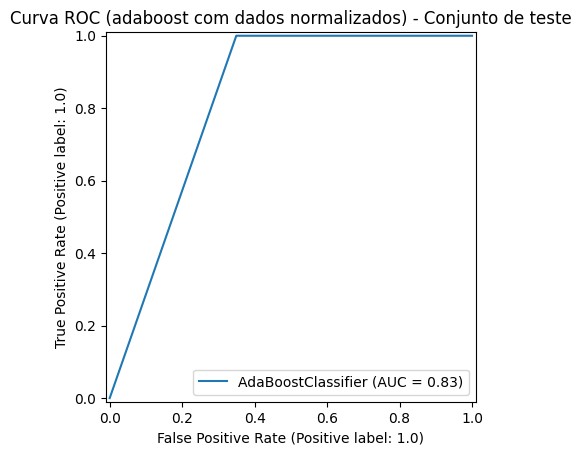

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

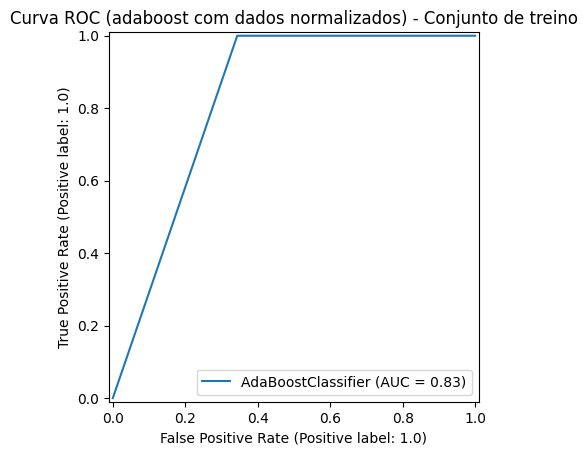

In [ ]:
Xadbn_train, Xadbn_test, yadbn_train, yadbn_test = train_test_split(x_norm, y, test_size=0.2, random_state=42, stratify = y)

adaboost_model_norm = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7), n_estimators=500,
                                         learning_rate=0.00001, algorithm='SAMME',
                                         random_state=42)

adaboost_model_norm.fit(Xadbn_train, yadbn_train)

yadbn_pred_test = adaboost_model_norm.predict(Xadbn_test)
yadbn_pred_train = adaboost_model_norm.predict(Xadbn_train)

print('Métricas no conjunto de teste:')
accuracy_test_adbn = accuracy_score(yadbn_test, yadbn_pred_test)
print(f"Acurácia: {accuracy_test_adbn:.4f}")
print(classification_report(yadbn_test, yadbn_pred_test))

print('Métricas no conjunto de treino:')
accuracy_train_alt = accuracy_score(yadbn_train, yadbn_pred_train)
print(f"Acurácia: {accuracy_train_alt:.4f}")
print(classification_report(yadbn_train, yadbn_pred_train))

plot_curva_roc('adaboost com dados normalizados',adaboost_model_norm,Xadbn_train,Xadbn_test,yadbn_train,yadbn_test)

## Gradient boost - Sem normalizar

---



Métricas no conjunto de teste:
Acurácia: 0.9144
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      6747
         1.0       0.86      0.71      0.78      1853

    accuracy                           0.91      8600
   macro avg       0.89      0.84      0.86      8600
weighted avg       0.91      0.91      0.91      8600

Métricas no conjunto de treino:
Acurácia: 0.9128
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     26987
         1.0       0.86      0.71      0.78      7410

    accuracy                           0.91     34397
   macro avg       0.89      0.84      0.86     34397
weighted avg       0.91      0.91      0.91     34397



<Figure size 640x480 with 0 Axes>

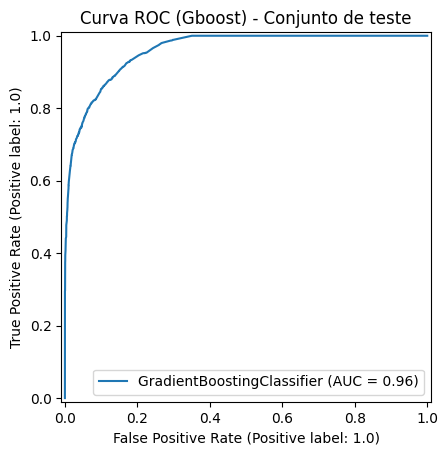

<Figure size 640x480 with 0 Axes>

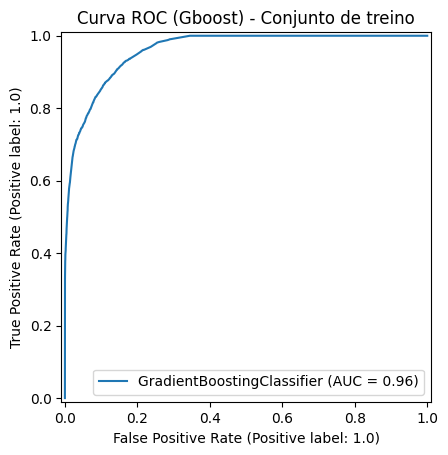

In [ ]:
X_gbtrain, X_gbtest, y_gbtrain, y_gbtest = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

gdboost_model = GradientBoostingClassifier(
 loss='log_loss', learning_rate=0.1, n_estimators=5000, subsample=0.1,
 criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
 min_weight_fraction_leaf=0.0, max_depth=50, min_impurity_decrease=0.0,
 init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None,
 warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.002)

gdboost_model.fit(X_gbtrain, y_gbtrain)

y_gbpred_test = gdboost_model.predict(X_gbtest)
y_gbpred_train = gdboost_model.predict(X_gbtrain)

print('Métricas no conjunto de teste:')
accuracy_testgb = accuracy_score(y_gbtest, y_gbpred_test)
print(f"Acurácia: {accuracy_testgb:.4f}")
print(classification_report(y_gbtest, y_gbpred_test))

print('Métricas no conjunto de treino:')
accuracy_train_alt = accuracy_score(y_gbtrain, y_gbpred_train)
print(f"Acurácia: {accuracy_train_alt:.4f}")
print(classification_report(y_gbtrain, y_gbpred_train))

plot_curva_roc('Gboost',gdboost_model,X_gbtrain,X_gbtest,y_gbtrain,y_gbtest)

## Gradient boost - Normalizando

---



Métricas no conjunto de teste:
Acurácia: 0.9144
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      6747
         1.0       0.86      0.71      0.78      1853

    accuracy                           0.91      8600
   macro avg       0.89      0.84      0.86      8600
weighted avg       0.91      0.91      0.91      8600

Métricas no conjunto de treino:
Acurácia: 0.9129
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     26987
         1.0       0.86      0.71      0.78      7410

    accuracy                           0.91     34397
   macro avg       0.89      0.84      0.86     34397
weighted avg       0.91      0.91      0.91     34397



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

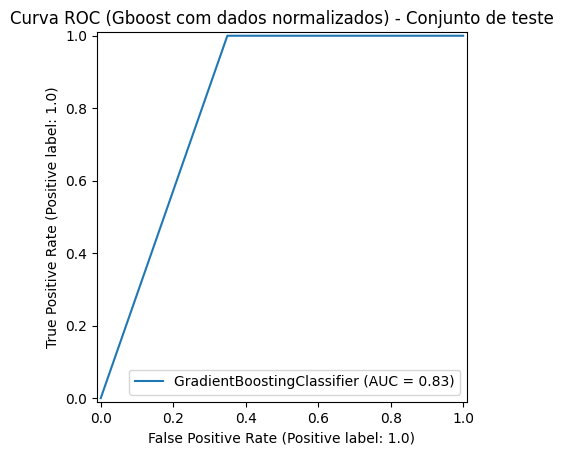

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

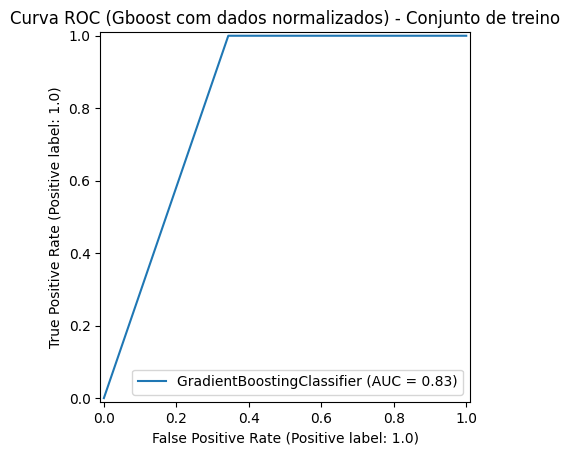

In [ ]:
X_gbntrain, X_gbntest, y_gbntrain, y_gbntest = train_test_split(x_norm, y, test_size=0.2, random_state=42, stratify = y)

gdboost_model_norm = GradientBoostingClassifier(
 loss='log_loss', learning_rate=0.1, n_estimators=5000, subsample=0.1,
 criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
 min_weight_fraction_leaf=0.0, max_depth=50, min_impurity_decrease=0.0,
 init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None,
 warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.002)

gdboost_model_norm.fit(X_gbntrain, y_gbntrain)

y_gbnpred_test = gdboost_model_norm.predict(X_gbntest)
y_gbnpred_train = gdboost_model_norm.predict(X_gbntrain)

print('Métricas no conjunto de teste:')
accuracy_gbntest = accuracy_score(y_gbntest, y_gbnpred_test)
print(f"Acurácia: {accuracy_gbntest:.4f}")
print(classification_report(y_gbntest, y_gbnpred_test))

print('Métricas no conjunto de treino:')
accuracy_train_norm = accuracy_score(y_gbntrain, y_gbnpred_train)
print(f"Acurácia: {accuracy_train_norm:.4f}")
print(classification_report(y_gbntrain, y_gbnpred_train))

plot_curva_roc('Gboost com dados normalizados',gdboost_model_norm,X_gbntrain,X_gbntest,y_gbntrain,y_gbntest)

## SVM - Sem normalizar

---



Métricas no conjunto de teste:
Acurácia: 0.7740
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      6747
         1.0       0.48      0.59      0.53      1853

    accuracy                           0.77      8600
   macro avg       0.68      0.71      0.69      8600
weighted avg       0.79      0.77      0.78      8600

Métricas no conjunto de treino:
Acurácia: 0.7640
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84     26987
         1.0       0.46      0.59      0.52      7410

    accuracy                           0.76     34397
   macro avg       0.67      0.70      0.68     34397
weighted avg       0.79      0.76      0.77     34397



<Figure size 640x480 with 0 Axes>

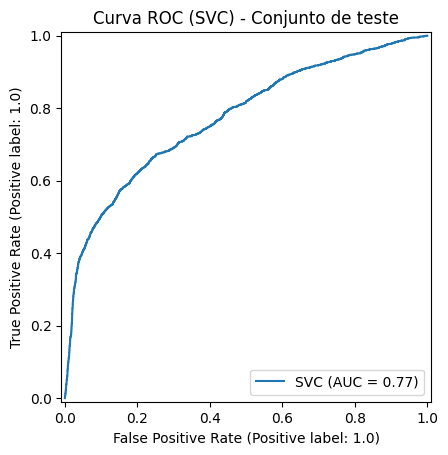

<Figure size 640x480 with 0 Axes>

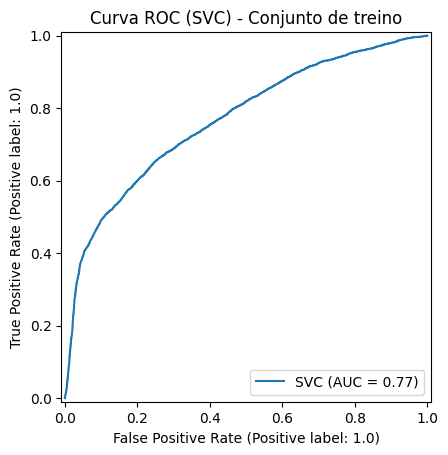

In [ ]:
X_svctrain, X_svctest, y_svctrain, y_svctest = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

svc = SVC(C=1000.0, kernel='rbf', gamma='scale', shrinking=True, probability=False, tol=0.001, cache_size=200,
        class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=42)

svc.fit(X_svctrain, y_svctrain)

y_pred_svctest = svc.predict(X_svctest)
y_pred_svctrain = svc.predict(X_svctrain)

print('Métricas no conjunto de teste:')
accuracy_svctest = accuracy_score(y_svctest, y_pred_svctest)
print(f"Acurácia: {accuracy_svctest:.4f}")
print(classification_report(y_svctest, y_pred_svctest))

print('Métricas no conjunto de treino:')
accuracy_svctrain = accuracy_score(y_svctrain, y_pred_svctrain)
print(f"Acurácia: {accuracy_svctrain:.4f}")
print(classification_report(y_svctrain, y_pred_svctrain))

plot_curva_roc('SVC',svc,X_svctrain,X_svctest,y_svctrain,y_svctest)

## SVM - Normalizando

---



Métricas no conjunto de teste:
Acurácia: 0.8667
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      6747
         1.0       0.63      0.92      0.75      1853

    accuracy                           0.87      8600
   macro avg       0.80      0.89      0.83      8600
weighted avg       0.90      0.87      0.87      8600

Métricas no conjunto de treino:
Acurácia: 0.8782
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     26987
         1.0       0.65      0.95      0.77      7410

    accuracy                           0.88     34397
   macro avg       0.82      0.90      0.84     34397
weighted avg       0.91      0.88      0.89     34397



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

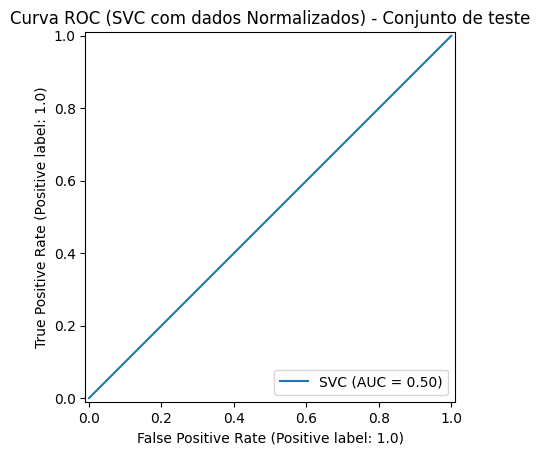

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

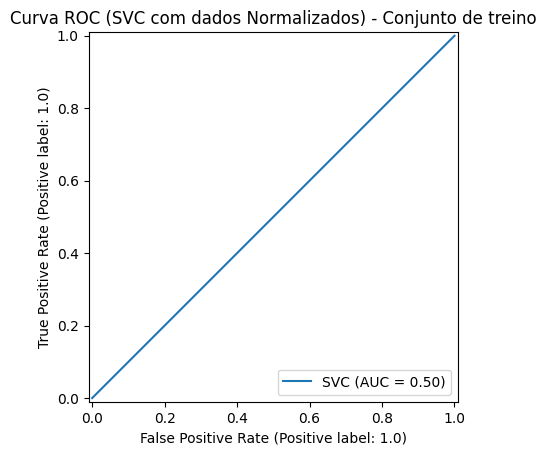

In [ ]:
X_svcntrain, X_svcntest, y_svcntrain, y_svcntest = train_test_split(x_norm, y, test_size=0.2, random_state=42, stratify = y)

svcn = SVC(C=2, kernel='rbf', gamma='scale', shrinking=True, probability=False, tol=0.0001, cache_size=200,
        class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=42)

svcn.fit(X_svcntrain, y_svcntrain)

y_pred_svcntest = svcn.predict(X_svcntest)
y_pred_svcntrain = svcn.predict(X_svcntrain)

print('Métricas no conjunto de teste:')
accuracy_svcntest = accuracy_score(y_svcntest, y_pred_svcntest)
print(f"Acurácia: {accuracy_svcntest:.4f}")
print(classification_report(y_svcntest, y_pred_svcntest))

print('Métricas no conjunto de treino:')
accuracy_svcntrain = accuracy_score(y_svcntrain, y_pred_svcntrain)
print(f"Acurácia: {accuracy_svcntrain:.4f}")
print(classification_report(y_svcntrain, y_pred_svcntrain))

plot_curva_roc('SVC com dados Normalizados',svcn,X_svcntrain,X_svcntest,y_svcntrain,y_svcntest)

## KNN - Normalizando

---



Métricas no conjunto de teste:
Acurácia: 0.8851
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     26988
         1.0       0.83      0.59      0.69      7410

    accuracy                           0.89     34398
   macro avg       0.86      0.78      0.81     34398
weighted avg       0.88      0.89      0.88     34398

Métricas no conjunto de treino:
Acurácia: 0.8928
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      6746
         1.0       0.85      0.61      0.71      1853

    accuracy                           0.89      8599
   macro avg       0.87      0.79      0.82      8599
weighted avg       0.89      0.89      0.89      8599



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

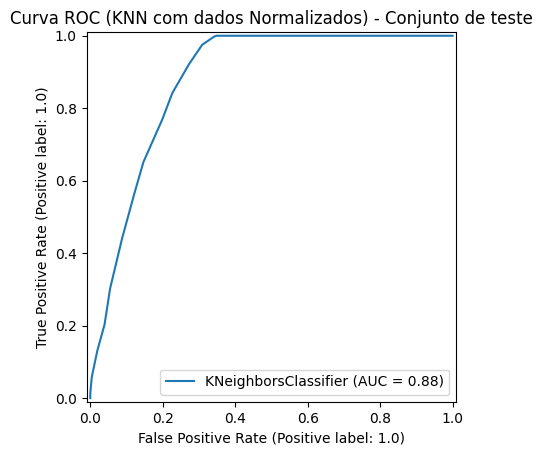

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

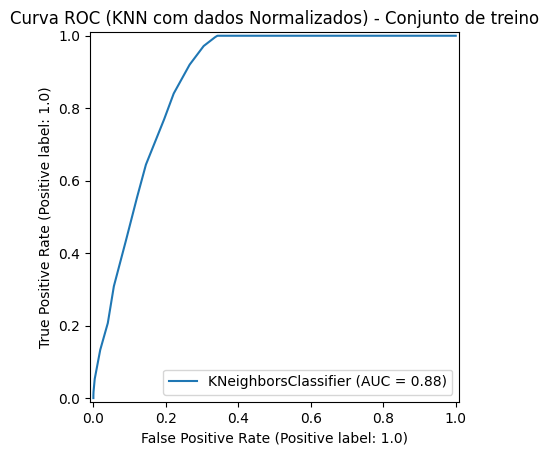

In [ ]:
X_KNNntrain, X_KNNntest, y_KNNntrain, y_KNNntest = train_test_split(x_norm, y, test_size=0.8, random_state=42, stratify = y)

NKNN = KNeighborsClassifier(
    n_neighbors=50,
    weights='uniform',
    algorithm='ball_tree',
    leaf_size=2,
    p=1,
    metric='minkowski',
    n_jobs=-1
)

NKNN.fit(X_KNNntrain, y_KNNntrain)

y_pred_KNNntest = NKNN.predict(X_KNNntest)
y_pred_KNNntrain = NKNN.predict(X_KNNntrain)

print('Métricas no conjunto de teste:')
accuracy_KNNntest = accuracy_score(y_KNNntest, y_pred_KNNntest)
print(f"Acurácia: {accuracy_KNNntest:.4f}")
print(classification_report(y_KNNntest, y_pred_KNNntest))

print('Métricas no conjunto de treino:')
accuracy_KNNntrain = accuracy_score(y_KNNntrain, y_pred_KNNntrain)
print(f"Acurácia: {accuracy_KNNntrain:.4f}")
print(classification_report(y_KNNntrain, y_pred_KNNntrain))

plot_curva_roc('KNN com dados Normalizados',NKNN,X_KNNntrain,X_KNNntest,y_KNNntrain,y_KNNntest)

## KNN - Sem normalizar

---



Métricas no conjunto de teste:
Acurácia: 0.8353
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     26988
         1.0       0.72      0.39      0.50      7410

    accuracy                           0.84     34398
   macro avg       0.78      0.67      0.70     34398
weighted avg       0.82      0.84      0.82     34398

Métricas no conjunto de treino:
Acurácia: 0.8385
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      6746
         1.0       0.73      0.40      0.52      1853

    accuracy                           0.84      8599
   macro avg       0.79      0.68      0.71      8599
weighted avg       0.83      0.84      0.82      8599



<Figure size 640x480 with 0 Axes>

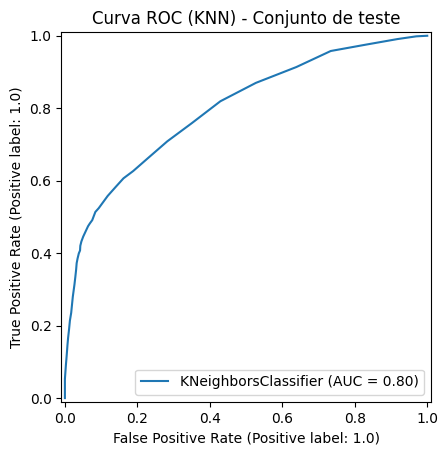

<Figure size 640x480 with 0 Axes>

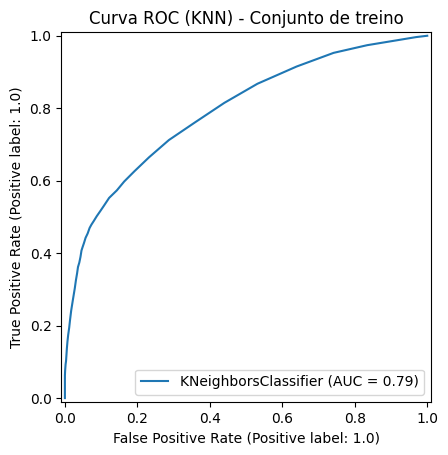

In [ ]:
X_KNNtrain, X_KNNtest, y_KNNtrain, y_KNNtest = train_test_split(X, y, test_size=0.8, random_state=42, stratify = y)

KNN = KNeighborsClassifier(
    n_neighbors=50,
    weights='uniform',
    algorithm='ball_tree',
    leaf_size=2,
    p=1,
    metric='minkowski',
    n_jobs=-1
)

KNN.fit(X_KNNtrain, y_KNNtrain)

y_pred_KNNtest = KNN.predict(X_KNNtest)
y_pred_KNNtrain = KNN.predict(X_KNNtrain)

print('Métricas no conjunto de teste:')
accuracy_KNNtest = accuracy_score(y_KNNtest, y_pred_KNNtest)
print(f"Acurácia: {accuracy_KNNtest:.4f}")
print(classification_report(y_KNNtest, y_pred_KNNtest))

print('Métricas no conjunto de treino:')
accuracy_KNNtrain = accuracy_score(y_KNNtrain, y_pred_KNNtrain)
print(f"Acurácia: {accuracy_KNNtrain:.4f}")
print(classification_report(y_KNNtrain, y_pred_KNNtrain))

plot_curva_roc('KNN',KNN,X_KNNtrain,X_KNNtest,y_KNNtrain,y_KNNtest)

## XGboost - Normalizando

Métricas no conjunto de teste:
Acurácia: 0.8355
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      6747
         1.0       0.62      0.62      0.62      1853

    accuracy                           0.84      8600
   macro avg       0.76      0.76      0.76      8600
weighted avg       0.84      0.84      0.84      8600

Métricas no conjunto de treino:
Acurácia: 0.8355
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89     26987
         1.0       0.61      0.64      0.63      7410

    accuracy                           0.84     34397
   macro avg       0.76      0.76      0.76     34397
weighted avg       0.84      0.84      0.84     34397



<Figure size 640x480 with 0 Axes>

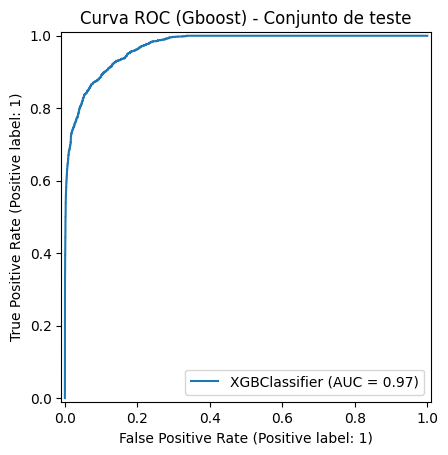

<Figure size 640x480 with 0 Axes>

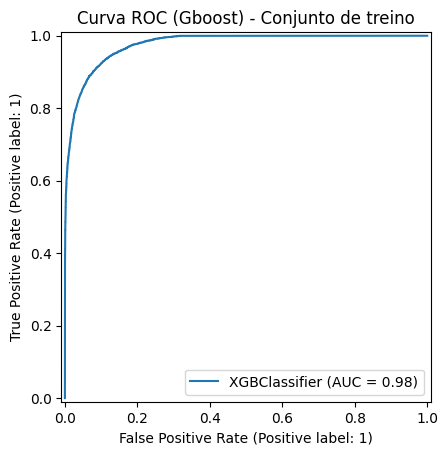

In [ ]:
import xgboost as xgb

X_xgbntrain, X_xgbntest, y_xgbntrain, y_xgbntest = train_test_split(x_norm, y, test_size=0.2, random_state=42, stratify = y)

xgbn = xgb.XGBClassifier(
    max_depth=30,              # Profundidade máxima da árvore
    learning_rate=0.005,       # Taxa de aprendizado
    n_estimators=300,          # Número de árvores
    objective='binary:logistic',  # Objetivo para classificação binária
    subsample=0.8,             # Subamostragem das instâncias de treinamento
    colsample_bytree=0.8,      # Subamostragem das características
    gamma=1,                   # Mínima redução de perda para divisão
    reg_alpha=5.3,               # Regularização L1
    reg_lambda=4.5,              # Regularização L2
    random_state=42            # Para reprodutibilidade
)

xgbn.fit(X_xgbntrain, y_xgbntrain)

y_xgbnpred_test = xgbn.predict(X_xgbntest)
y_xgbnpred_train = xgbn.predict(X_xgbntrain)

print('Métricas no conjunto de teste:')
accuracy_xgbntest = accuracy_score(y_xgbntest, y_xgbnpred_test)
print(f"Acurácia: {accuracy_xgbntest:.4f}")
print(classification_report(y_xgbntest, y_xgbnpred_test))

print('Métricas no conjunto de treino:')
accuracy_xgbntrain = accuracy_score(y_xgbntrain, y_xgbnpred_train)
print(f"Acurácia: {accuracy_xgbntrain:.4f}")
print(classification_report(y_xgbntrain, y_xgbnpred_train))

plot_curva_roc('Gboost',xgbn,X_xgbntrain,X_xgbntest,y_xgbntrain,y_xgbntest)

## XGboost - Sem normalização

Métricas no conjunto de teste:
Acurácia: 0.9233
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      6747
         1.0       0.93      0.70      0.80      1853

    accuracy                           0.92      8600
   macro avg       0.93      0.84      0.87      8600
weighted avg       0.92      0.92      0.92      8600

Métricas no conjunto de treino:
Acurácia: 0.9256
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     26987
         1.0       0.93      0.71      0.80      7410

    accuracy                           0.93     34397
   macro avg       0.93      0.85      0.88     34397
weighted avg       0.93      0.93      0.92     34397



<Figure size 640x480 with 0 Axes>

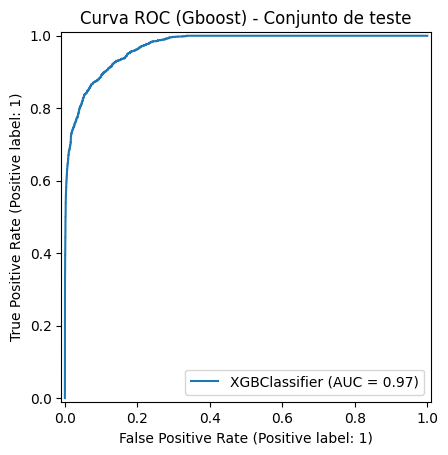

<Figure size 640x480 with 0 Axes>

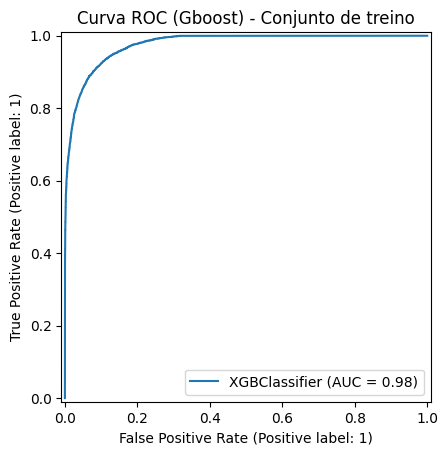

In [ ]:
import xgboost as xgb

X_xgbtrain, X_xgbtest, y_xgbtrain, y_xgbtest = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

xgb = xgb.XGBClassifier(
    max_depth=30,              # Profundidade máxima da árvore
    learning_rate=0.005,       # Taxa de aprendizado
    n_estimators=300,          # Número de árvores
    objective='binary:logistic',  # Objetivo para classificação binária
    subsample=0.8,             # Subamostragem das instâncias de treinamento
    colsample_bytree=0.8,      # Subamostragem das características
    gamma=1,                   # Mínima redução de perda para divisão
    reg_alpha=5.3,               # Regularização L1
    reg_lambda=4.5,              # Regularização L2
    random_state=42            # Para reprodutibilidade
)

xgb.fit(X_xgbtrain, y_xgbtrain)

y_xgbpred_test = xgb.predict(X_xgbtest)
y_xgbpred_train = xgb.predict(X_xgbtrain)

print('Métricas no conjunto de teste:')
accuracy_xgbtest = accuracy_score(y_xgbtest, y_xgbpred_test)
print(f"Acurácia: {accuracy_xgbtest:.4f}")
print(classification_report(y_xgbtest, y_xgbpred_test))

print('Métricas no conjunto de treino:')
accuracy_xgbtrain = accuracy_score(y_xgbtrain, y_xgbpred_train)
print(f"Acurácia: {accuracy_xgbtrain:.4f}")
print(classification_report(y_xgbtrain, y_xgbpred_train))

plot_curva_roc('Gboost',xgb,X_xgbtrain,X_xgbtest,y_xgbtrain,y_xgbtest)

## Resumo gráfico dos resultados obtidos pelos modelos

In [ ]:
# Classe 0

data = {
    'Modelo': ['AdaBoost', 'AdaBoost Normalizado', 'Gradient Boosting', 'Gradient Boosting Normalizado',
              'SVM', 'SVM Normalizado', 'KNN', 'KNN Normalizado', 'XGBoost', 'XGBoost Normalizado'],
    'Accuracy': [0.9193, 0.9200, 0.9144, 0.9144, 0.7740, 0.8667, 0.8353, 0.8851, 0.9233, 0.8355],
    'Precision': [0.96, 0.96, 0.96, 0.96, 0.85, 0.95, 0.87, 0.89, 0.92, 0.94],
    'Recall': [0.96, 0.96, 0.96, 0.96, 0.92, 0.85, 0.95, 0.96, 0.98, 0.92],
    'F1-Score': [0.96, 0.96, 0.96, 0.96, 0.88, 0.90, 0.91, 0.92, 0.95, 0.93]
}

df = pd.DataFrame(data)

titles = ['Comparação da Acurácia', 'Comparação da Precisão', 'Comparação do Recall', 'Comparação do F1-Score']

auc_values = [0.86, 0.83, 0.96, 0.83, 0.77, 0.50, 0.88, 0.80, 0.97, 0.97]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, ax in enumerate(axes.flat):
    sns.barplot(data=df, x='Modelo', y=metrics[i], ax=ax,palette='viridis')
    ax.set_title(titles[i], fontsize=14)
    ax.set_ylim(0, 1)
    ax.set_ylabel(metrics[i], fontsize=12)
    ax.set_xlabel('Modelo', fontsize=12)

    for j, model in enumerate(df['Modelo']):
        auc_value = auc_values[j]
        ax.text(j, df[metrics[i]][j] + 0.02, f'AUC: {auc_value:.2f}', ha='center', fontsize=7, color='black')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

# Classe 1

data = {
    'Modelo': ['AdaBoost', 'AdaBoost Normalizado', 'Gradient Boosting', 'Gradient Boosting Normalizado',
              'SVM', 'SVM Normalizado', 'KNN', 'KNN Normalizado', 'XGBoost', 'XGBoost Normalizado'],
    'Accuracy': [0.9193, 0.9200, 0.9144, 0.9144, 0.7740, 0.8667, 0.8353, 0.8851, 0.9233, 0.8355],
    'Precision': [0.87, 0.87, 0.86, 0.86, 0.48, 0.63, 0.72, 0.83, 0.93, 0.62],
    'Recall': [0.74, 0.74, 0.71, 0.71, 0.59, 0.92, 0.39, 0.59, 0.70, 0.62],
    'F1-Score': [0.80, 0.80, 0.78, 0.78, 0.53, 0.75, 0.50, 0.69, 0.80, 0.62]

}

df = pd.DataFrame(data)

titles = ['Comparação da Acurácia', 'Comparação da Precisão', 'Comparação do Recall', 'Comparação do F1-Score']

auc_values = [0.86, 0.83, 0.96, 0.83, 0.77, 0.50, 0.88, 0.80, 0.97, 0.97]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, ax in enumerate(axes.flat):
    sns.barplot(data=df, x='Modelo', y=metrics[i], ax=ax,palette='viridis')
    ax.set_title(titles[i], fontsize=14)
    ax.set_ylim(0, 1)
    ax.set_ylabel(metrics[i], fontsize=12)
    ax.set_xlabel('Modelo', fontsize=12)

    for j, model in enumerate(df['Modelo']):
        auc_value = auc_values[j]
        ax.text(j, df[metrics[i]][j] + 0.02, f'AUC: {auc_value:.2f}', ha='center', fontsize=7, color='black')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

## Conclusão

Considerando as métricas obtidas no conjunto de treino para classe 1 (empréstimo aprovado):

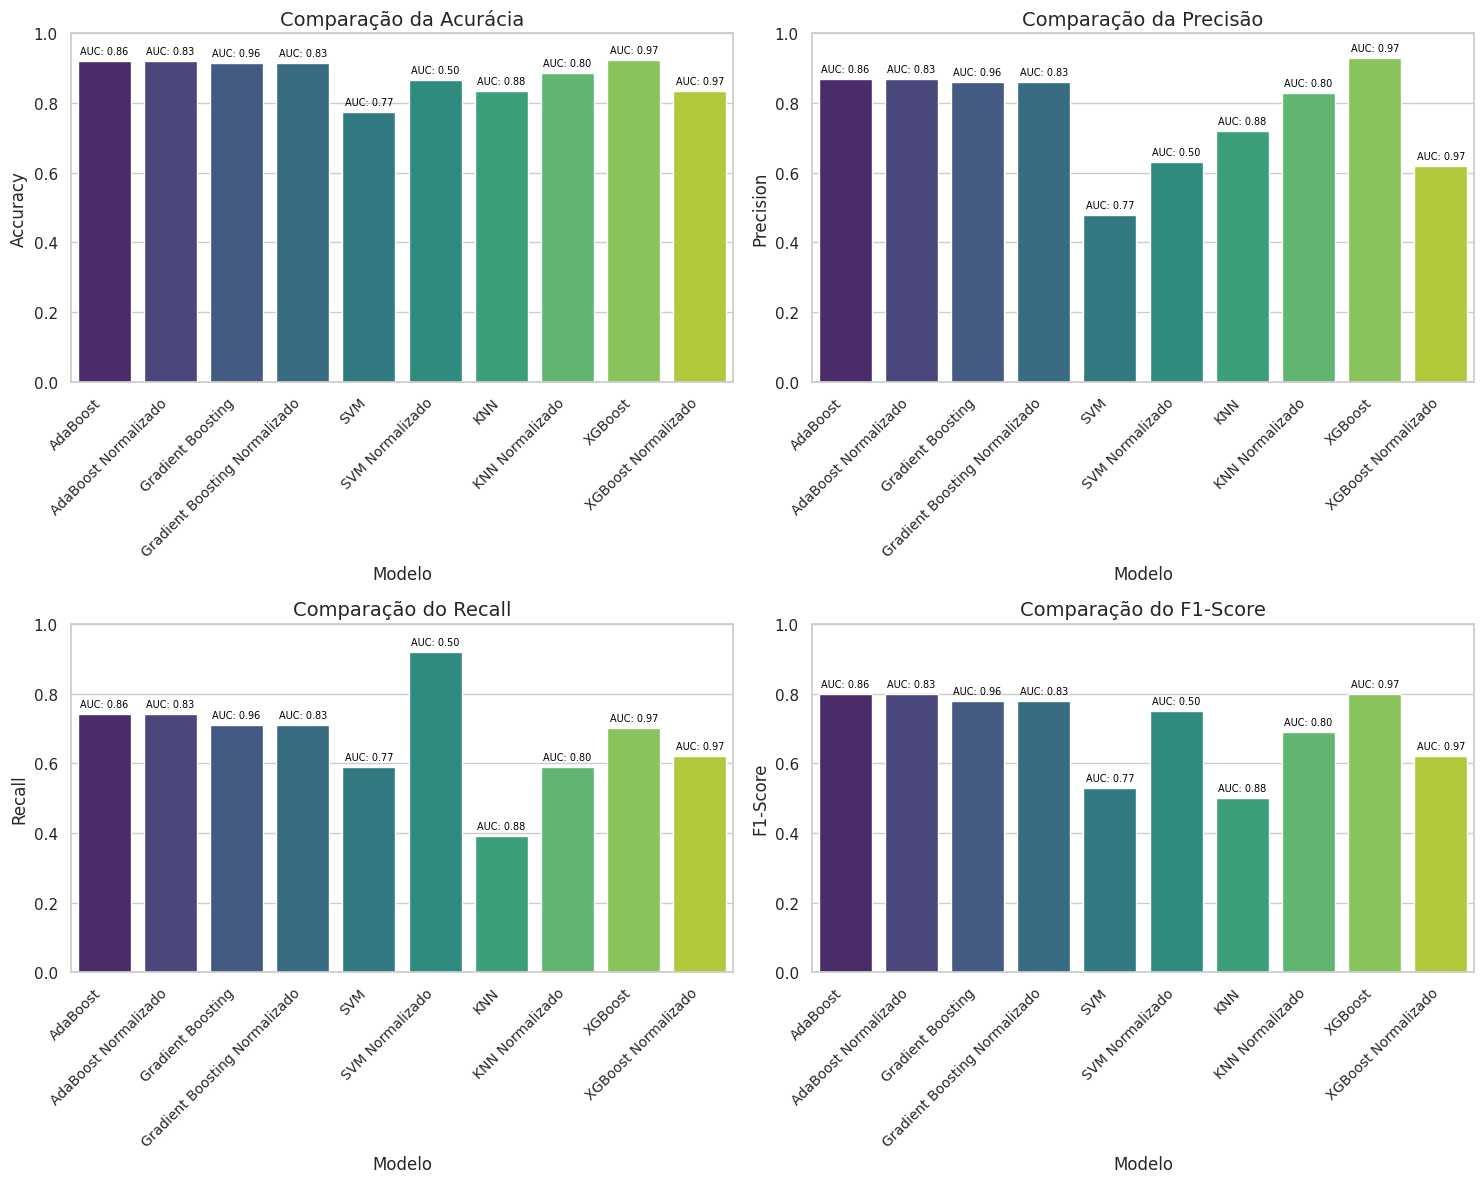

e no conjunto de teste  para classe 0 (empréstimo negado):

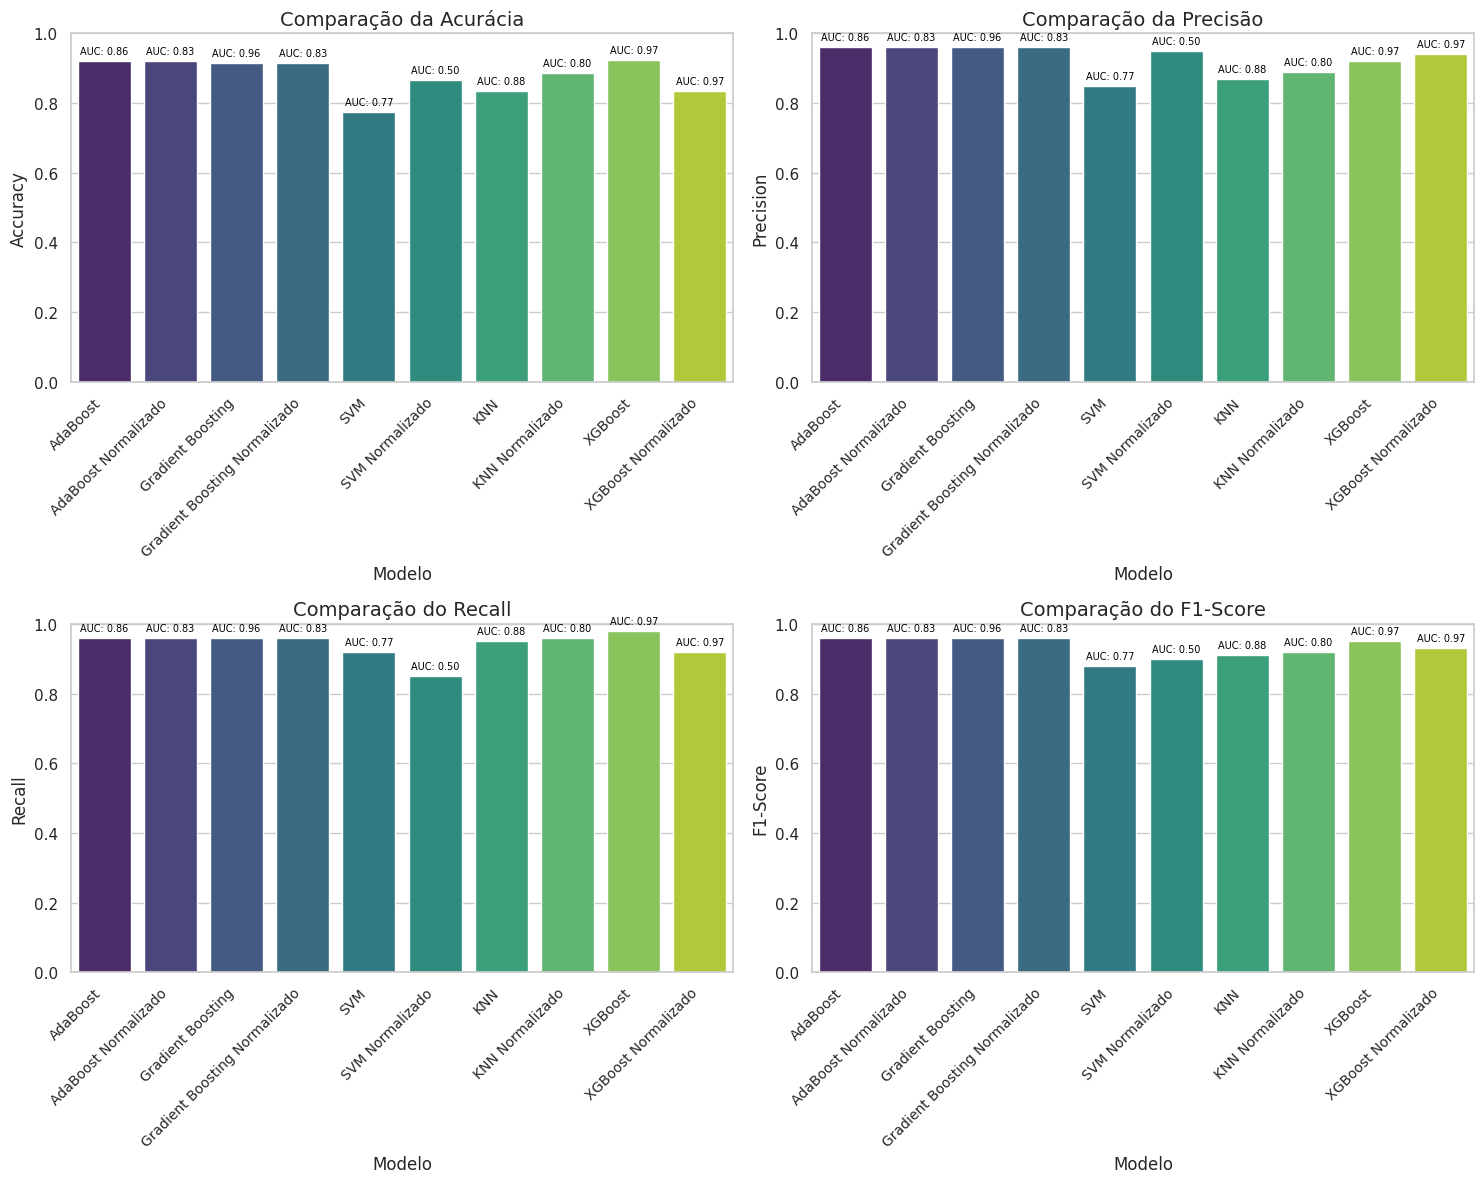

O modelo XGBoost sem normalização obteve os melhores resultados para a classe 0 (empréstimo reprovado). Ele apresentou uma acurácia de 92.33%, com precisão de 92% e recall de 99%, resultando em um F1-score de 95%. Esses resultados indicam que o XGBoost é o modelo mais eficaz para identificar empréstimos reprovados, equilibrando bem precisão e recall. Comparado aos outros modelos, o XGBoost sem normalização se destaca pela capacidade de detectar corretamente os empréstimos reprovados, minimizando falsos positivos.